# Data Analysis Task for Classification and Association Rule


__Implemented by:__ _Mehrdad Bozorg_

### 1- Part one: predict label for new entry 

__Problem definition:__ To build a data driven model that reads input variables (defined by the 9 features listed above), which characterize a new customer and predicts his response.

__Aproach:__ Supervised Learning <br>
__Chosen Algorithm:__ ensemble random forest <br>
__Programming Environment:__ Python3 <br>
__Libraries:__ pandas (to read and preapare data), Numpy (to do numerical operations over data), sklearn (to run algorihm ensemble random forest), pyplot (to draw graphs)


__Step 1: Data preparation__ <br>
To do any analysis over data, it's neccessary to read data and prepare it in a format which is most suitable for our method of analysis. To reach this goal, I used library _pandas_ to get data in a dataframe to use it as tabular data.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # Just to mute warnings, if you like you can comment this line.

In [2]:
df = pd.read_csv('InputData.csv')
df.head() #To see the format of data and being sure that data is taken successfully.



,name,age,lifestyle,zip code,family status,car,sports,earnings,label,Living area
0,VnSEFOuL,62.0,cozily,50168.0,married,practical,athletics,102526.0,no response,urban
1,8Tv0hcce,34.0,active,66479.0,married,expensive,soccer,33006.0,no response,urban
2,Zny9ysbk,69.0,healthy,16592.0,single,expensive,badminton,118760.0,response,urban
3,HV3xCamM,57.0,cozily,50068.0,married,practical,soccer,131429.0,response,urban
4,sflRsQ6v,66.0,cozily,35988.0,single,practical,badminton,96003.0,response,urban


In [10]:
df.columns

Index(['name', 'age', 'lifestyle', 'zip code', 'family status', 'car',
       'sports', 'earnings', 'label', 'Living area'],
      dtype='object')

In [11]:
df.describe()

,age,zip code,earnings
count,10000.000000,10000.000000,10000.000000
mean,42.090700,55227.270600,85337.799600
std,15.874416,26139.756227,37554.523323
min,15.000000,10003.000000,20006.000000
25%,28.000000,32708.250000,53237.250000
50%,42.000000,55290.000000,85617.500000
75%,56.000000,77967.750000,118111.000000
max,69.000000,99982.000000,149975.000000


To run decision tree (or random forest) algorithm over the data, we need to convert string values of categorical columns to numeric as below, for columns _lifestyle_, _family status_, _car_, _sports_, _living area_, and _label_:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
name             10000 non-null object
age              10000 non-null float64
lifestyle        10000 non-null object
zip code         10000 non-null float64
family status    10000 non-null object
car              10000 non-null object
sports           8500 non-null object
earnings         10000 non-null float64
label            10000 non-null object
Living area      10000 non-null object
dtypes: float64(3), object(7)
memory usage: 781.3+ KB


In [7]:
df.describe(include =['object'])

,name,lifestyle,family status,car,sports,label,Living area
count,10000,10000,10000,10000,8500,10000,10000
unique,10000,3,2,2,3,2,2
top,NmxWBagh,active,married,practical,athletics,no response,urban
freq,1,3375,5032,5051,2853,6640,6300


In [13]:
df['label'].value_counts()

no response    6640
response       3360
Name: label, dtype: int64

In [14]:
df['label'].value_counts(normalize=True)

no response    0.664
response       0.336
Name: label, dtype: float64

In [15]:
df.sort_values(by='age', ascending=False).head()

,name,age,lifestyle,zip code,family status,car,sports,earnings,label,Living area
9999,eBED7EpQ,69.0,healthy,90816.0,single,practical,athletics,149683.0,response,rural
7087,kvgjcp6s,69.0,healthy,83256.0,single,practical,NaN,129255.0,response,rural
3535,dbUuQVOR,69.0,cozily,22679.0,single,expensive,soccer,28724.0,response,urban
421,MGusCNUD,69.0,active,85790.0,married,expensive,badminton,94639.0,response,urban
7676,vcpupoGs,69.0,healthy,21295.0,single,practical,badminton,66150.0,response,rural


In [16]:
df.sort_values(by=['age', 'earnings'],
        ascending=[True, False]).head()

,name,age,lifestyle,zip code,family status,car,sports,earnings,label,Living area
452,kieZCleC,15.0,active,42692.0,single,practical,soccer,148014.0,response,urban
6944,2oGAOcQ5,15.0,healthy,25102.0,married,practical,badminton,147751.0,response,urban
3759,12K3EOBX,15.0,active,46842.0,married,expensive,athletics,147361.0,response,rural
990,DriRExfl,15.0,cozily,21490.0,married,expensive,NaN,145400.0,response,urban
2074,BAnHCGzE,15.0,cozily,74617.0,single,practical,soccer,145184.0,response,urban


In [3]:
df['lifestyle'] = pd.factorize(df['lifestyle'])[0]
df['family status'] = pd.factorize(df['family status'])[0]
df['car'] = pd.factorize(df['car'])[0]
df['sports'] = pd.factorize(df['sports'])[0]
df['Living area'] = pd.factorize(df['Living area'])[0]
df['label'] = pd.factorize(df['label'])[0]

(10000, 10)

Then we get column label as y or our result (output):

In [4]:
y = df['label']

To prepare X or train data, we need first remove output and also we need to remove column name. As name is kind of identifier for each row of our dataset, it's much possible to be unique for each row. And so in calculation of it's enthropy we get the maximum value, but with low ratio which is misleading. To handle this problem there are to options:<br>
1- Apply ratio for each feature befor selection, which is not preferable as it needs to do some extra calculation and as we are prety much sure that after application the ratio, the result for name would be close to zero ($1/1000$), so we don't do it. <br>
2- Remove it from dataset, because we know it wouldn't be chosen as indexing feature and as features are assumed relatively independent, we can remove it without any significant effect on our result. <br>
I did this operation as below:

In [5]:
df.drop(['name', 'label'], axis=1, inplace=True)

And the shape of data would be as below:

In [6]:
df.head()

,age,lifestyle,zip code,family status,car,sports,earnings,Living area
0,62.0,0,50168.0,0,0,0,102526.0,0
1,34.0,1,66479.0,0,1,1,33006.0,0
2,69.0,2,16592.0,1,1,2,118760.0,0
3,57.0,0,50068.0,0,0,1,131429.0,0
4,66.0,0,35988.0,1,0,2,96003.0,0


In [7]:
X = df.copy() #Just for convenience in naming

__Step 2: Run the algorithm__ <br>
To run ensemble random forest algorithm, I got benefit of library sklearn, and from that imported: <br> 
- `RandomForestClassifier` to do classification prediction. <br>
- `cross_val_score` to do cross validation 
- `GridSearchCV` to find best parameters using gird search method. <br>
- `accuracy_score` to call accuracy metric and calculate.

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Run the algorithm without any improvement on parameters, here `n_splits` shows the proportion of train and test data in crossvalidation, `shuffle` indicates randomizing with seed value of 42 which is indicated with arg `random_state`:

In [9]:
# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier with the default parameters 
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Train it on the training set
results = cross_val_score(rfc, X, y, cv=skf)

# Evaluate the accuracy on the test set
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 91.12%


We get the accuracy of 91.12%.

__Step3: Find the hyper parameters__ <br>
Among all the parameters of Random Forest Classifier, the most segnificant which may cause improvement on the accuracy or prevent overfitting are as following: <br>

- `n_estimators` — the number of trees in the forest;
- `criterion` — the function used to measure the quality of a split (enthropy or gini_impurity);
- `max_features` — the number of features to consider when looking for the best split;
- `min_samples_leaf` — the minimum number of samples required to be at a leaf node;
- `max_depth` — the maximum depth of the tree.

To find the best suiting parameters we can apply grid search manualy or call function `GridSearchCV` from library GridSearchCV with folowing set of values to check from: <br>
- `max_features`: [4, 6, 8]
- `min_samples_leaf`: [1, 3, 5, 7] 
- `max_depth`: [5,10,15,20]

In [11]:
# Initialize the set of parameters for exhaustive search and fit 
parameters = {'max_features': [4, 6, 8], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=75, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': [4, 6, 8], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

By application of these parameter in `RandomForestClassifier`, we get the accuracy 92.07%.

In [14]:
# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier with the default parameters 
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=5, max_features=4, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
             oob_score=True, random_state=42, verbose=0, warm_start=False)

# Train it on the training set
results = cross_val_score(rfc, X, y, cv=skf)

# Evaluate the accuracy on the test set
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 92.07%


__Step 4:Prediction__ <br>
To do prediction for our entry we need to convert the values to numeric as what our predict function could get. I did it as following:

In [91]:
def convert_entry(entry):
    new_ent = entry[1:] # Eliminate name
    
    # lifestyle
    if entry[1] == 'cozily':
        new_ent[1] = 0
    elif entry[1] == 'active':
        new_ent[1] = 1
    else:
        new_ent[1] =2
        
    # family status
    if entry[3] == 'married':
        new_ent[3] = 0
    else:
        new_ent[3] = 1
        
    #car
    if entry[4] == 'practical':
        new_ent[4] = 0
    else:
        new_ent[4] = 1
        
    # sports
    if entry[5] == 'athletics':
        new_ent[5] = 0
    elif entry[5] == 'soccer':
        new_ent[5] = 1
    elif entry[5] == 'badminton':
        new_ent[5] = 2
    else:
        new_ent[5] = 3
    
    #Living area
    if entry[7] == 'urban':
        new_ent[7] = 0
    else:
        new_ent[7] = 1
        
    return new_ent

In [92]:
entry = ['name', 65.0, 'cozily', 50723, 'single', 'expensive', 'soccer', 132526, 'rural'] #examplary entry


In [95]:
rfc.fit(X, y)
print(rfc.predict([convert_entry(entry)]))

[1]


__Some observations:__ <br> To see the effect of parameters and this regularization with grid search, I included a manual checking the effect of some parameters which is depicted by their following graphs. <br>
__Note:__ I used library `pyplot` to draw graphs.

1- Parameter `n_estimators` (number of trees):

Best accuracy on CV is 91.95% with 75 trees


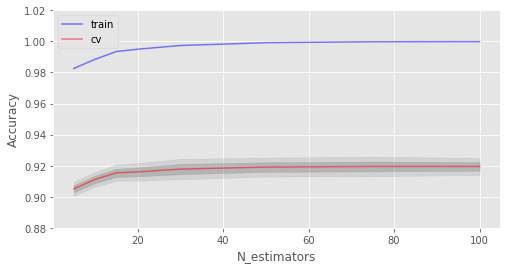

In [96]:
# Initialize the validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Train on the training set
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

The best accuracy is 91.95% which is obtained with 75 trees, which is improved in comparision to default values. However, the train data tends to overfit.


2- Parameter `max_depth`:

Best accuracy on CV is 92.06% with 5 max_depth


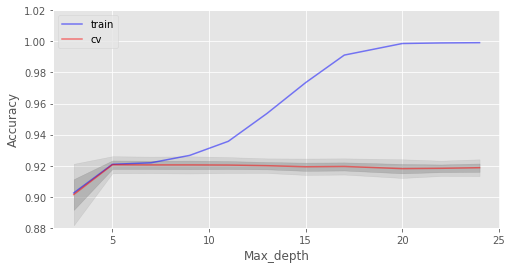

In [97]:
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Train on the training set 
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

The best accuracy is 92.06% which is obtained with maximum depth 0f 5. And we could decrease the tendency to overfiting.

3- Parameter `min_samples_leaf`:

Best accuracy on CV is 92.08% with 9 min_samples_leaf


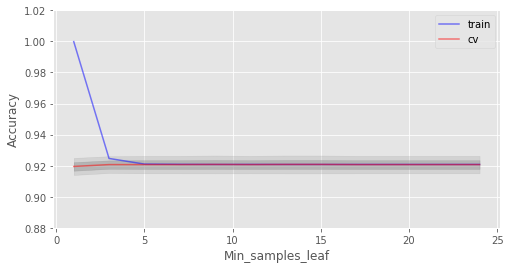

In [98]:
from matplotlib import pyplot as plt
# Create lists to save accuracy values on the training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

# Train on the training set
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

The best accuracy is 92.08% which is obtained with min samples leaf of 9. And as can be seen the train accuracy is decreased, which means we could overcome the overfiting. 

__Note:__
This algorithm is chosen, because it is more confident to be regularized and with slightly better performance rather than decision tree with less than 1%. However, it much outperforms the other classifiers such as Deep Learning which get us accuracy score of 53.28% with 16.07% of deviation and Linear regression with 63% of accuracy. Which this result for deep learning is likey because of the low dimention and size of data and for the regression could be because of categorial fields. <br> 
You can find the code of decision tree with the file named `solution_dt.ipynb` and its tree with the file name `solution_tree.png` in the root path. Also the code for deep learning with keras library is also included which is named `solution_ann_keras.ipynb` as well, the regression code is available with the name `solution_reg.ipynb`. 

### 2- Part two: Discovering the best environment

__Problem definition:__ To build a data driven model that reads input variables (defined by the 9 features listed above), which characterize a new customer and predicts his response.

__Aproach:__ Supervised Learning <br>
__Chosen Algorithm:__ Eclat <br>
__Programming Environment:__ Python3 <br>
__Libraries:__ pandas (to read and preapare data), fim (to call eclat algorithm from it)


__Step1: Data Preparation__ <br>
After getting data, to prepare it for Eclat, we need to categorize all columns to find the frequency of each set of items (here features with specific categorial value) which consquent the label "respnse". <br>
This problem mapped on the first step of algorithms for "association rule discovery", which we need to find frequent sets with specific length threshold (instead of frequency threshold). <br>
To compare with association rule discovery problem, in solving problem of finding rules like $X \to Y$, here we have the $Y$, so we don't need to do the second step of the algorithm to find most satisfying rules among the frequnt subset candidates. But, as we know the consequent item, we just need to find the most satisfying frequent subsets in subdomain of specific value for consequenct value (which is 'response' here). <br>
So we need to just get the entries with label 'response', which is done as following:

In [99]:
import pandas as pd
df = pd.read_csv('InputData.csv', header=None )
df = df[df[8]== 'response']
df.drop([0, 8], axis=1, inplace=True)
df.head()

,1,2,3,4,5,6,7,9
3,69.0,healthy,16592.0,single,expensive,badminton,118760.0,urban
4,57.0,cozily,50068.0,married,practical,soccer,131429.0,urban
5,66.0,cozily,35988.0,single,practical,badminton,96003.0,urban
8,59.0,cozily,40432.0,single,practical,soccer,41166.0,urban
9,63.0,active,55994.0,single,practical,badminton,134340.0,urban


And to categorize the continual columns:

In [100]:
def categorize(id, cat_num, cat_label):
    max_val = pd.to_numeric(df.iloc[:,id]).max()
    min_val = pd.to_numeric(df.iloc[:,id]).min()
    val_range = max_val - min_val
    sec_len = val_range / cat_num
    
    for i in range(len(df.iloc[:,id])):    
        if float(df.iloc[i,id]) < min_val + sec_len:
            df.iloc[i,id] = cat_label + "_1"
        elif min_val + sec_len<= float(df.iloc[i,id]) and float(df.iloc[i,id]) < min_val + 2*sec_len:
            df.iloc[i,id] = cat_label + "_2"
        elif min_val + 2*sec_len <= float(df.iloc[i,id]) and float(df.iloc[i,id]) < min_val + 3*sec_len:
            df.iloc[i,id] = cat_label + "_3"
        elif min_val + 3*sec_len <= float(df.iloc[i,id]) and float(df.iloc[i,id]) < min_val + 4*sec_len:
            df.iloc[i,id] = cat_label + "_4"
        elif min_val + 4*sec_len <= float(df.iloc[i,id]) and float(df.iloc[i,id]) <= max_val:
            df.iloc[i,id] = cat_label + "_5"



In [101]:
categorize(0, 5, 'age')
categorize(2, 5, 'postal')
categorize(6, 5, 'earning')

And to solve the problem of blank cells in sports column, I chose to fill them with the value 'empty' as a new category (what is automatically done in most of algorithm such as some default states of decision tree).<br>
However, if we have some domain specific information, we cand fill these cells with values like median, which may have malicious effect on our results in this case.

In [102]:
def fill_blanks(id):
    for i in range(len(df.iloc[:,id])):
        if pd.isnull(df.iloc[i,id]):
            df.iloc[i,id] = 'empty'
fill_blanks(5)

And the final data could be like following:

In [103]:
df.head()

,1,2,3,4,5,6,7,9
3,age_5,healthy,postal_1,single,expensive,badminton,earning_4,urban
4,age_4,cozily,postal_3,married,practical,soccer,earning_5,urban
5,age_5,cozily,postal_2,single,practical,badminton,earning_3,urban
8,age_5,cozily,postal_2,single,practical,soccer,earning_1,urban
9,age_5,active,postal_3,single,practical,badminton,earning_5,urban


__Step2:Run the algorithm__<br> Finally to run the algorithm we need to call function `elcat` from library `fim` as following:

In [104]:
from fim import eclat
def elcat_func(df):    
    n = len(df)
    transactions = []
    for i in range(0, n):
        transaction = []
        m = len(df.values[i])
        for j in range(0, m):
            data = str(df.values[i,j])
            if data != "nan":
                transaction.append(data)
                transactions.append(transaction)

    rules = eclat(tracts = transactions, zmin = 3)
    rules.sort(key = lambda x: x[1], reverse = True)
    return rules
print(elcat_func(df))

[(('expensive', 'single', 'urban'), 4560), (('single', 'age_5', 'urban'), 4520), (('practical', 'age_5', 'urban'), 4368), (('expensive', 'age_5', 'urban'), 4360), (('married', 'practical', 'urban'), 4280), (('married', 'age_5', 'urban'), 4208), (('practical', 'single', 'urban'), 4128), (('married', 'expensive', 'urban'), 3920), (('expensive', 'single', 'age_5'), 3576), (('practical', 'single', 'age_5'), 3520), (('married', 'practical', 'age_5'), 3504), (('married', 'expensive', 'age_5'), 3312), (('healthy', 'single', 'urban'), 2984), (('healthy', 'age_5', 'urban'), 2920), (('active', 'age_5', 'urban'), 2912), (('cozily', 'age_5', 'urban'), 2896), (('earning_5', 'expensive', 'urban'), 2896), (('active', 'single', 'urban'), 2888), (('active', 'practical', 'urban'), 2848), (('cozily', 'expensive', 'urban'), 2840), (('healthy', 'expensive', 'urban'), 2840), (('cozily', 'single', 'urban'), 2816), (('healthy', 'practical', 'urban'), 2808), (('earning_5', 'single', 'urban'), 2808), (('active'

__Result:__ As can be seen the urban person with expensive car, who is single, would be more possibly responsive.
